# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random as random
%matplotlib inline

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [43]:
# 1 вариант
N = 1000000
df = pd.DataFrame(columns = ['coin1', 'coin2'])
coin1 = sts.bernoulli(.5)
coin2= sts.bernoulli(.5)
df['coin1'] = coin1.rvs(N)
df['coin2'] = coin2.rvs(N)

p = len(df[df['coin1']!= df['coin2'] ])/len(df)

0.50032

In [23]:
# 2 вариант
N = 1000000
coin = 0  

for i in range(0,1000000):
    coin1 = random.choice(['орел', 'решка'])
    coin2 = random.choice(['орел', 'решка'])
    if coin1 !=  coin2 :
        coin = coin + 1
p = coin / N
p

0.499928

In [14]:
# 3 вариант
elements = np.array(['орел','решка'])
probabilities = [0.5, 0.5]
N = 1000000 
coins = np.random.choice(elements, N, p = probabilities)
df = pd.DataFrame(coins, columns = ['coins'])
p = len(df.query('coins == "орел"')) / len(df)
p

0.500302

In [24]:
# 4 вариант
n = 1
p =  .5
size = 1000
coin = np.random.binomial(n, p, size = size)
len(coin[coin==1])/len(coin)

0.504

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [2]:
ALL = {RRR,HHH,RHH,RHR,HRH,HRR,HHR,RRH} #все возможные события
A = {RRR}
B = {RHH,HRH,HHR}
C = {HHH,RHH,RRH,HRH}


array(['R', 'H', 'H', ..., 'R', 'R', 'R'], dtype='<U1')

In [35]:
elements = np.array(['H','R'])
probabilities = [0.5, 0.5]
N = 1000000 
coin1 = np.random.choice(elements, N, p = probabilities)
coin2 = np.random.choice(elements, N, p = probabilities)
coin3 = np.random.choice(elements, N, p = probabilities)

In [5]:
# A = {не выпало ни одного герба}

df = pd.DataFrame(zip(coin1, coin2, coin3), columns = ['coin1','coin2','coin3'])
p = len(df.query('coin1==coin2==coin3=="R"'))/len(df)
p

0.125173

In [37]:
# B = {выпало четное число гербов}
df = pd.DataFrame(zip(coin1, coin2, coin3), columns = ['coin1','coin2','coin3'])
p = len(df.query('coin1==coin2=="H" | coin1==coin3=="H" | coin2==coin3=="H" & coin1!=coin2!=coin3'))/len(df)
p

0.374482

In [6]:
# C = {на третьей монете выпал герб}

p = len(df.query('coin3=="H"'))/len(df)
p

0.5004

Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [ ]:
ALL = {11,12,13,14,15,16,21,22,23,24,25,26,31,32,33,34,35,36,41,42,43,44,45,46,51,52,53,54,55,56,61,62,63,64,65,66}
A = {66}
B = {56,65,66}
C = {11,12,13,14,15,21,22,23,24,25,31,32,33,34,35,41,42,43,44,45,51,52,53,54,55}

In [4]:
# A = {вышло две "шестерки"}

N = 1000000 
r1 = np.random.randint(1,7,size=N, dtype=int)
r2 = np.random.randint(1,7,size=N, dtype=int)

df = pd.DataFrame(zip(r1,r2), columns = ['kub1','kub2'])
p = len(df.query('kub1==kub2==6'))/len(df)
p

0.027623

In [5]:
#B = {сумма выпавших очков не меньше 11}
p = len(df.query('kub1+kub2>=11'))/len(df)
p

0.083219

In [6]:
# C = {не выпала ни одна "шестерка"}
p = len(df.query('kub1!=6 & kub2!=6'))/len(df)
p

0.694803

## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}




In [7]:
N = 1000000 
r1 = np.random.randint(1,7,size=N, dtype=int)
r2 = np.random.randint(1,7,size=N, dtype=int)
p = len(df.query('kub1==6 | kub2==6'))/len(df)
p

0.305197

Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [9]:
N = 1000000 
n1 = np.random.randint(0,10,size=N, dtype=int)
n2 = np.random.randint(0,10,size=N, dtype=int)
n3 = np.random.randint(0,10,size=N, dtype=int)


In [10]:
#A = {Стерлись различные цифры}

df = pd.DataFrame(zip(n1, n2, n3), columns = ['number1','number2','number3'])
p = len(df.query('number1!=number2 & number1!=number3 & number2!=number3'))/len(df)
p

0.719601

In [11]:
# B = {Стерлись одинаковые цифры}
df = pd.DataFrame(zip(n1, n2, n3), columns = ['number1','number2','number3'])
p = len(df.query('number1==number2==number3'))/len(df)
p

0.010173

In [12]:
# C = {Среди стершихся цифр хотя бы две совпадают}

df = pd.DataFrame(zip(n1, n2, n3), columns = ['number1','number2','number3'])
p = len(df.query('number1==number2 | number1==number3 | number2==number3'))/len(df)
p

0.280399

In [13]:
# D = {Среди стершихся цифр хотя бы две различны}

df = pd.DataFrame(zip(n1, n2, n3), columns = ['number1','number2','number3'])
p = len(df.query('number1!=number2 | number1!=number3 | number2!=number3'))/len(df)
p

0.989827

## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [16]:
N = 10 #кол-во билетов
V = 1 # кол-во выигравших билетов
SUM = 10 # сумма выигрыша
COST = 1 #стоимость билета
values= [0, 9] # список возможных значений (проиграл либо чистый выигрыш)

p_of_win =  .1 #вероятность выигрыша
p_of_lose = 1-p_of_win #вероятность проигрыша
probabilities = [p_of_lose, p_of_win]

In [17]:
elements = np.random.choice(values, N, p=probabilities)
                          
elements

array([9, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
# 1 вариант
rez_table = list(map(lambda x: 
                np.random.choice(values, 1, p= probabilities)[0]
                if x == elements[0] 
                else np.random.choice(values, 1, p=probabilities)[0],
                elements))
rez_table

[0, 0, 0, 9, 0, 0, 0, 9, 9, 0]

In [22]:
# 2 вариант
def test_table(elements, values = values):
    rez_table = []
    for n in range(N):
        if elements[n] == values[0]:
            rez_table.append(np.random.choice(values, 1, p= probabilities)[0])
        elif elements[n] == values[1]:
            rez_table.append(np.random.choice(values, 1, p=probabilities)[0])
    return rez_table

In [26]:

rez_table =  test_table(elements, values = values)
rez_table

[0, 0, 9, 0, 0, 0, 0, 0, 0, 0]

In [27]:
df = pd.DataFrame(columns = ['values', 'probabilities'])
df['values'] = values
df['probabilities'] = probabilities
df.head(10)

,values,probabilities
0,0,0.9
1,9,0.1


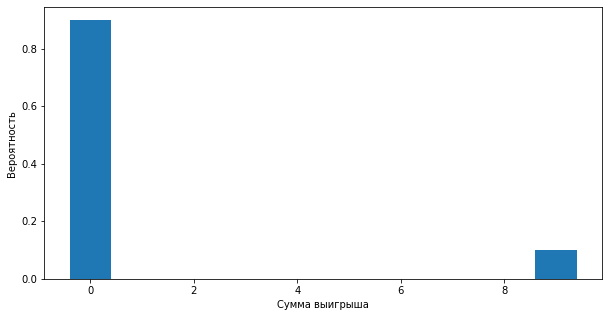

In [28]:
plt.figure(figsize=(10,5))
ax = plt.bar(values, probabilities)
plt.xlabel('Сумма выигрыша')
plt.ylabel('Вероятность')
plt.show()    

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [63]:
values = [2,3,4,5,6,7,8,9,10,11,12]
variation = 6**2
Sum_2 = {11}
Sum_3 = {12,21}
Sum_4 = {13,31,22}
Sum_5 = {14,41,23,32}
Sum_6 = {15,51,24,42,33}
Sum_7 = {16,61,25,52,34,43}
Sum_8 = {26,62,35,53,44}
Sum_9 = {36,63,45,54}
Sum_10 ={46,64,55}
Sum_11 ={56,65}
Sum_12 ={66}


In [84]:
df = pd.DataFrame(columns = ['values', 'variations','probabilities'])
df['values'] = values
df['variations'] = [1,2,3,4,5,6,5,4,3,2,1]
df['probabilities'] = (df.variations / variation).round(2)
df.count()

values           11
variations       11
probabilities    11
dtype: int64

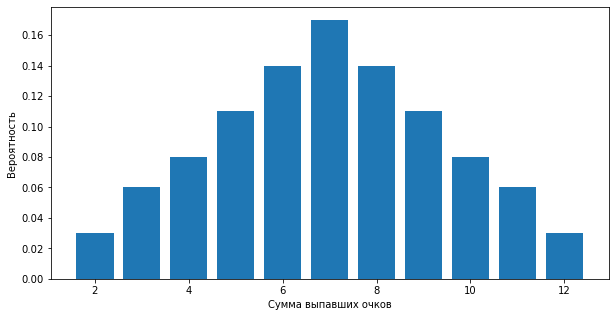

In [87]:
plt.figure(figsize=(10,5))
ax = plt.bar(df['values'], df['probabilities'])
plt.xlabel('Сумма выпавших очков')
plt.ylabel('Вероятность')
plt.show()  

In [74]:
# вероятности событий  𝑋<=4 ,  𝑋>4
N = 1000000 
r1 = np.random.randint(1,7,size=N, dtype=int)
r2 = np.random.randint(1,7,size=N, dtype=int)
df = pd.DataFrame(zip(r1,r2), columns = ['kub1','kub2'])
p = len(df.query('kub1<=4 & kub2>4'))/len(df)
p

0.222339

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [82]:
elements = np.array(['6pic','7pic', '8pic','9pic','10pic','Vpic','Dpic','Kpic','Tpic','6bub','7bub','8bub','9bub','10bub','Vbub','Dbub','Kbub','Tbub','6tref','7tref','8tref','9tref','10tref','Vtref','Dtref','Ktref','Ttref','6ch','7ch','8ch','9ch','10ch','Vch','Dch','Kch','Tch'])
kart1 = np.random.choice(elements, 10000)
kart2 = np.random.choice(elements, 10000)

df = pd.DataFrame(zip(kart1,kart2), columns = ['kart1','kart2'])


p1 = len(df.query('kart1=="6pic" | kart1=="6bub" | kart1=="6tref" | kart1=="6ch"'))/len(df)
p2 = len(df.query('kart2=="7pic" | kart2=="7bub" | kart2=="7tref" | kart2=="7ch"'))/(len(df)-1)
p = p1*p2
p # вероятность того, что первая карта шестерка, а вторая семерка

0.011891989198919891

In [86]:
# вероятность того что обе карты бубновой масти
p3 = len(df.query('kart1=="6bub" ')) / len(df)
p4 = len(df.query('kart2=="7bub"')) / (len(df)-1)
p5 = p3*p4
p5

0.000704950495049505

## Какой-то топорный и неверный способ, но я так и не смогла решить эту задачу через функцию, поэтому я буду очень признательна, если вы мне дадите обратную связь и подсказку, т.к. я потратила очень много времени!!! ниже привожу то, что смогла написать с пояснениями. Посмотрите, пожалуйста.

## Ниже сгенерировала колоду. Перевела в одномерный массив, т.к. выходила ошибка при использовании функции np.random.choice  что массив должен быть одномерный. 

In [91]:
masts = ['pic', 'bub', 'tref' ,'cherv'] 
faces = ['6', '7', '8', '9', '10' ,'valet', 'dama', 'korol', 'tuz']
cards = []
for mast in masts:
    for face in faces:
        for i in range(1):
            cards.append((mast,face))
df = pd.DataFrame(cards)
cards2=df[0] + df[1]


#Чтобы достать карту:
selection = np.random.randint(0, len(cards2)-1, 2) #на выходе индексы элементов

## Ниже - вроде все работает. Формируются 2 карты (selection), извлеченных из колоды и оставшаяся колода карт (cards2). Далее пытаюсь применить эти функции и сделать выборку по условиям, но у меня ничего не получается.

In [40]:
def delete_kart(cards2):
    index = random.randint(0, len(cards2)-1)
    selection = cards2.pop(index)
    return selection, cards2
karts = []
for i in range(2):  # n - число доставаемых карт
    selection, cards2 = delete_kart(cards2)
    karts.append(selection)
print ('Got the karts', karts)


Got the karts ['pictuz', 'picvalet']


In [54]:
def draw_ball(cards2):
    index = random.randint(0, len(cards2)-1)
    selection = cards2.pop(index)
    return selection, cards2

def new_hat():
    masts = ['pic', 'bub', 'tref' ,'cherv'] 
    faces = ['6', '7', '8', '9', '10' ,'valet', 'dama', 'korol', 'tuz']
    cards = []
    for mast in masts:
        for face in faces:
            for i in range(1):
                cards.append((mast,face))
        return cards
df = pd.DataFrame(cards)
cards2=df[0] + df[1]

n = 2
N = 100000

M = 0
for e in range(N):
    cards2 = new_hat()
    balls = []
    for i in range(n):
        if selection[0]==??????:
            selection, cards2 = draw_ball(cards2)
            balls.append(selection)
            M += 1

        
print ('Probability:', float(M)/N)

<ipython-input-54-0615969af70f>:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if selection[0]==cards[face==6]:


Probability: 0.0


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [128]:
colors = np.array(['white','black'])
np.random.choice(colors, 5)

array(['white', 'black', 'white', 'white', 'black'], dtype='<U5')

In [150]:
def new_hat():
    colors = 'white','black'
    hat = []
    for color in colors:
        for i in range(2):
            if color == 'white':
                hat.append(color)
        for i in range(3):
            if color == 'black':
                hat.append(color)
    return hat

hat = new_hat()
hat

['white', 'white', 'black', 'black', 'black']

In [151]:
def draw_ball(hat):
    color = np.random.choice(hat)
    if color == 'white':
        hat.remove(color)
    elif color == 'black':
        hat.remove(color)
        hat.append('white')
    return color, hat
hat = draw_ball(hat)
hat

('black', ['white', 'white', 'black', 'black', 'white'])

In [152]:
n = int(input('How many balls are to be drawn? '))
N = int(input('How many experiments? '))

W = 0
B = 0
for e in range(N):
    hat = new_hat()
    balls = []
    for i in range(n):
        color, hat = draw_ball(hat)
        balls.append(color)
        if color == 'white':
            if balls.count('white')==2:
                W+=1
        else:
            #hat.append(color=='white')
            if balls.count('black')==2:
                B+=1
            
print ('Probability:', float(W)/N)
print ('Probability:', float(B)/N)

How many balls are to be drawn? 2
How many experiments? 100000
Probability: 0.10056
Probability: 0.23755
